In [6]:
import os
import sys
from scgt import GeoTiff
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/')
sys.path.append('/Users/nvalett/Documents/Natalie/Species Dist Research/Code/ecoscape-earth/ecoscape-connectivity/')
from EcoLinker.EcoLinker.restorationOptimizer import restorationOptimizer, defecitRestoration, noisyDefecitRestoration, utopianRestoration
from ecoscape_connectivity_local import repopulation, util
import matplotlib.pyplot as plt
import ecoscape_connectivity
from scgt import GeoTiff, Tile
import numpy as np
import torch
import rasterio

In [2]:
DATA_PATH="/Users/nvalett/Documents/Natalie/Species Dist Research/Thesis/EcoLinker/tests/assets"
HABITAT_PATH = os.path.join(DATA_PATH, "smol/hab_smol.tif")
TERRAIN_PATH = os.path.join(DATA_PATH, "smol/terrain.tif")
RESTORED_TERRAIN_PATH = os.path.join(DATA_PATH, "smol/restored_ter_smol.tif")
PERMEABILITY_PATH = os.path.join(DATA_PATH, "paper_repro/transmission_refined_1.csv")

CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop.tif")
NOISY_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_noisy.tif")
UTOPIAN_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_utopian.tif")
RESTORED_CONNECTIVITY_PATH = os.path.join(DATA_PATH, "smol/repop_after_restoration.tif")
FLOW_PATH = os.path.join(DATA_PATH, "smol/grad.tif")
NOISY_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_noisy.tif")
UTOPIAN_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_utopian.tif")
RESTORED_FLOW_PATH = os.path.join(DATA_PATH, "smol/grad_after_restoration.tif")
DEATH_PATH = os.path.join(DATA_PATH, "smol/death.tif")

defecitOptimizer = defecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50)
noisyOptimizer = noisyDefecitRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, NOISY_CONNECTIVITY_PATH, NOISY_FLOW_PATH)
utopianOptimizer = utopianRestoration(HABITAT_PATH, TERRAIN_PATH, RESTORED_TERRAIN_PATH, CONNECTIVITY_PATH, FLOW_PATH, RESTORED_CONNECTIVITY_PATH, RESTORED_FLOW_PATH, DEATH_PATH, PERMEABILITY_PATH, 50, UTOPIAN_CONNECTIVITY_PATH, UTOPIAN_FLOW_PATH, permiability=1.0)

In [4]:
# utopian restoration
utopianOptimizer.run_connectivity()
utopianOptimizer.run_utopian_connectivity()

utopianOptimizer.restore(verbose=True)
utopianOptimizer.run_connectivity(restored=True)
print(f"Delta connectivity: {noisyOptimizer.get_delta_connectivity()}")
print(f"Percent connectivity changed: {noisyOptimizer.get_connectivity_percent_changed()}%")
# print(f"Connectivity/death: {noisyOptimizer.get_restoration_efficency()}")

run regular connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036496350365, 201: 0.03351824817518248, 300: 0.0, 303: 0.0, 304: 0.3585985401459854, 305: 0.09874452554744526, 308: 1.0, 400: 0.0, 401: 0.0018686131386861315, 404: 0.9, 405: 0.9, 500: 0.031532846715328466, 501: 0.0016934306569343065, 502: 0.0001751824817518248, 505: 0.04525547445255475, 506: 0.0012846715328467154, 507: 0.0, 510: 0.0, 511: 0.0012262773722627738, 513: 0.0008175182481751825, 514: 0.0, 515: 0.0, 600: 0.0007007299270072992, 801: 0.0008175182481751825, 802: 0.0003503649635036496, 803: 0.0005839416058394161, 900: 0.01454014598540146, 909: 0.006014598540145986, 1101: 0.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.0009343065693430657, 1206: 0.0, 1401: 0.2715912408759124, 1402: 1.0, 1403: 0.9091386861313868, 1405: 0.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


run utopian connectivity with permiability: {0: 0.0, 100: 0.0, 104: 1.0, 105: 1.0, 107: 0.0, 108: 0.009635036496350365, 201: 0.03351824817518248, 300: 0.0, 303: 0.0, 304: 1.0, 305: 0.09874452554744526, 308: 1.0, 400: 0.0, 401: 1.0, 404: 1.0, 405: 0.9, 500: 1.0, 501: 0.0016934306569343065, 502: 0.0001751824817518248, 505: 1.0, 506: 0.0012846715328467154, 507: 0.0, 510: 0.0, 511: 0.0012262773722627738, 513: 0.0008175182481751825, 514: 0.0, 515: 0.0, 600: 1.0, 801: 0.0008175182481751825, 802: 0.0003503649635036496, 803: 0.0005839416058394161, 900: 1.0, 909: 1.0, 1101: 1.0, 1102: 0.0, 1103: 0.0, 1105: 0.0, 1106: 0.0, 1200: 0.0009343065693430657, 1206: 0.0, 1401: 1.0, 1402: 1.0, 1403: 1.0, 1405: 1.0}


ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


{(84, 141): 65535, (5, 103): 65535, (222, 34): 65535, (16, 103): 65535, (227, 34): 65535, (14, 103): 65535, (228, 34): 65535, (229, 34): 65535, (10, 103): 65535, (181, 165): 65535, (180, 165): 65535, (6, 103): 65535, (179, 165): 65535, (193, 124): 65535, (75, 34): 65535, (177, 165): 65535, (271, 34): 65535, (174, 165): 65535, (259, 34): 65535, (102, 165): 65535, (161, 200): 65535, (45, 125): 65535, (109, 165): 65535, (47, 125): 65535, (20, 103): 65535, (21, 103): 65535, (193, 165): 65535, (196, 165): 65535, (195, 124): 65535, (212, 124): 65535, (228, 124): 65535, (228, 165): 65535, (219, 165): 65535, (217, 165): 65535, (216, 165): 65535, (215, 165): 65535, (213, 165): 65535, (210, 165): 65535, (43, 103): 65535, (14, 125): 65535, (38, 103): 65535, (37, 103): 65535, (36, 103): 65535, (35, 103): 65535, (202, 165): 65535, (201, 165): 65535, (31, 103): 65535, (29, 103): 65535, (197, 165): 65535, (105, 165): 65535}
Restoring pixel (84, 141) from permiability 1.0 to 1.0
Restoring pixel (5, 10

ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: internal_proj_create_from_name: /Users/nvalett/opt/anaconda3/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.


Delta connectivity: 0
Percent connectivity changed: 0.0%


In [9]:
diff = utopianOptimizer.get_flow_diff()
print(np.sum(diff))

highest_diff = utopianOptimizer.get_highest_diff_pixels(diff, 100)
print(highest_diff)

377182805
(1, 218, 312)
(218, 312)
{(84, 141): 65535, (35, 103): 65535, (217, 165): 65535, (216, 165): 65535, (215, 165): 65535, (213, 165): 65535, (210, 165): 65535, (43, 103): 65535, (14, 125): 65535, (38, 103): 65535, (37, 103): 65535, (36, 103): 65535, (202, 165): 65535, (232, 200): 65535, (201, 165): 65535, (31, 103): 65535, (29, 103): 65535, (197, 165): 65535, (196, 165): 65535, (193, 165): 65535, (21, 103): 65535, (20, 103): 65535, (222, 34): 65535, (16, 103): 65535, (219, 165): 65535, (228, 165): 65535, (228, 124): 65535, (212, 124): 65535, (274, 33): 65535, (268, 33): 65535, (224, 166): 65535, (201, 166): 65535, (198, 166): 65535, (111, 83): 65535, (195, 166): 65535, (220, 10): 65535, (266, 33): 65535, (260, 33): 65535, (82, 124): 65535, (216, 10): 65535, (242, 166): 65535, (104, 83): 65535, (219, 10): 65535, (71, 34): 65535, (254, 10): 65535, (271, 34): 65535, (75, 34): 65535, (193, 124): 65535, (195, 124): 65535, (227, 34): 65535, (14, 103): 65535, (228, 34): 65535, (132, 20

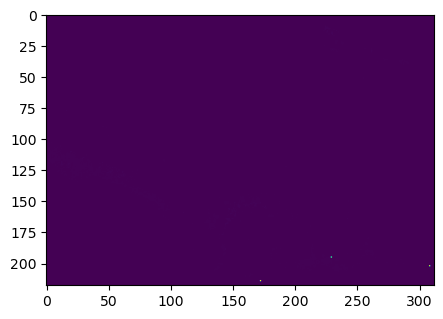

92757.51737226278


In [12]:
def get_highest_diff_pixels(diff, n=None):
    if (n == None):
        n = utopianOptimizer.pixels
    flat_indices = np.argpartition(diff.ravel(), -n)[-n:]
    diff = diff.squeeze(0)
    row_indices, col_indices = np.unravel_index(flat_indices, diff.shape)

    min_elements = diff[row_indices, col_indices]
    min_elements_order = np.argsort(min_elements)
    row_indices, col_indices = row_indices[min_elements_order], col_indices[min_elements_order]

    highest_diff = {}
    with GeoTiff.from_file(utopianOptimizer.habitat_fn) as hab:
        raw_hab = hab.get_all_as_tile().m
        raw_hab = raw_hab.squeeze(0)
    with GeoTiff.from_file(utopianOptimizer.terrain_fn) as terr:
        raw_terrain = terr.get_all_as_tile().m
        raw_terrain = raw_terrain.squeeze(0)

    i = n
    while (len(highest_diff.items()) < n and i >= 0):
        habitat = raw_hab[row_indices[i-1]][col_indices[i-1]]
        terrain = raw_terrain[row_indices[i-1]][col_indices[i-1]]
        permiability = utopianOptimizer.permeability_dict[terrain]
        print(f"habitat is {habitat}")
        print(f"permiability of {terrain} is {permiability}")

        if permiability < 1:
            highest_diff[(col_indices[i-1], row_indices[i-1])] = diff[row_indices[i-1]][col_indices[i-1]]
        i -= 1

    return highest_diff


with GeoTiff.from_file(utopianOptimizer.terrain_fn) as terr:
    raw_terrain = terr.get_all_as_tile().m
    # raw_terrain = raw_terrain.squeeze(0)

# multiplying diff by 1 - permiability
diff = utopianOptimizer.get_flow_diff()
permeability = ecoscape_connectivity.util.dict_translate(raw_terrain, utopianOptimizer.permeability_dict)
diff_weighted_permiability = diff * (np.ones_like(permeability) - permeability)
diff_weighted_permiability_tile = Tile(diff.shape[0], diff.shape[1], 0, 0, 0, 0, diff_weighted_permiability)
diff_weighted_permiability_tile.draw_tile()
print(np.sum(diff_weighted_permiability))

# diff_tile = Tile(diff.shape[0], diff.shape[1], 0, 0, 0, 0, diff)
# diff_tile.draw_tile()


# highest_diff = get_highest_diff_pixels(diff)
# print(highest_diff)


<Figure size 500x500 with 0 Axes>

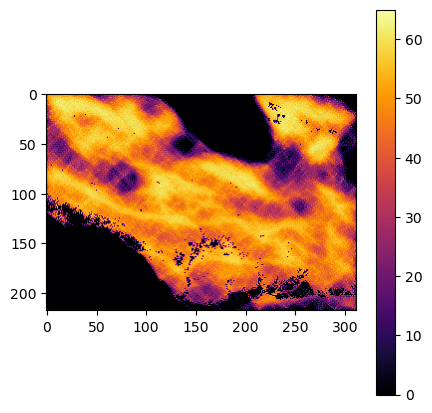

<Figure size 500x500 with 0 Axes>

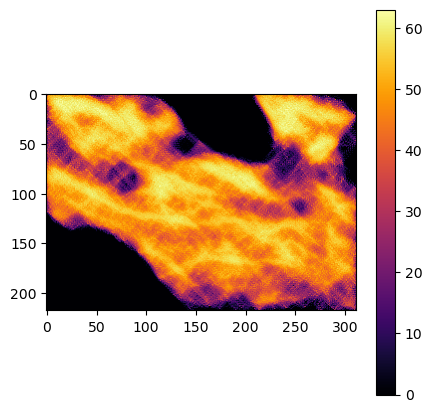

<Figure size 500x500 with 0 Axes>

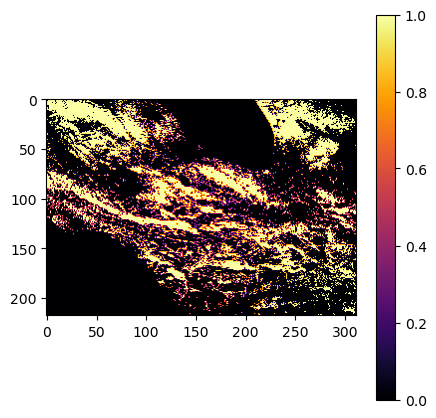

88661


In [6]:
with GeoTiff.from_file(FLOW_PATH) as flow:
    raw_flow = flow.get_all_as_tile().m
    flow.draw_geotiff()
with GeoTiff.from_file(UTOPIAN_FLOW_PATH) as utopian_flow:
    raw_utopian_flow = utopian_flow.get_all_as_tile().m
    utopian_flow.draw_geotiff()
with GeoTiff.from_file(HABITAT_PATH) as hab:
    hab.draw_geotiff()

print(np.sum(raw_utopian_flow) - np.sum(raw_flow))